In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestRegressor

import pickle

In [137]:
df = pd.read_csv('data/redfin-sold-last-five-years/all_cleaned.csv')

In [138]:

df = df[['PRICE','SOLD MONTH_Number','SOLD DATE_DAY','SOLD YEAR','PROPERTY TYPE','BEDS','BATHS','SQUARE FEET','LOT SIZE','YEAR BUILT','LOCATION']]
df.columns = ['PRICE','SOLD_MONTH_Number','SOLD_DATE_DAY','SOLD_YEAR','PROPERTY_TYPE','BEDS','BATHS','SQUARE_FEET','LOT_SIZE','YEAR_BUILT','LOCATION']

In [139]:
df.isnull().sum()

PRICE                    0
SOLD_MONTH_Number        0
SOLD_DATE_DAY            0
SOLD_YEAR                0
PROPERTY_TYPE            0
BEDS                  2288
BATHS                 4344
SQUARE_FEET           2394
LOT_SIZE             23203
YEAR_BUILT            2240
LOCATION                 0
dtype: int64

In [140]:
high_fre_index = df.LOCATION.value_counts().head(20).index
boolean_list = [(i not in high_fre_index) for i in df['LOCATION']]
remain_index = df[boolean_list].index
df.drop(remain_index, inplace=True)

In [141]:
high_fre_index = df.PROPERTY_TYPE.value_counts().head(9).index
boolean_list = [(i not in high_fre_index) for i in df['PROPERTY_TYPE']]
remain_index = df[boolean_list].index
df.drop(remain_index, inplace=True)

In [142]:
df

,PRICE,SOLD_MONTH_Number,SOLD_DATE_DAY,SOLD_YEAR,PROPERTY_TYPE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR_BUILT,LOCATION
18,332500,8,17,2021,Condo/Co-op,1.0,1.0,703.0,NaN,1995.0,Bothell
21,580000,3,28,2022,Condo/Co-op,2.0,2.0,987.0,NaN,1995.0,Bothell
62,770000,4,3,2020,Single Family Residential,5.0,2.5,2420.0,8613.0,1996.0,Bothell
71,750000,7,25,2019,Single Family Residential,5.0,2.5,2400.0,7270.0,1996.0,Bothell
89,1083000,1,24,2022,Single Family Residential,3.0,2.0,1540.0,11965.0,1985.0,Bothell
...,...,...,...,...,...,...,...,...,...,...,...
173562,1252201,1,15,2019,Single Family Residential,4.0,3.0,2976.0,4794.0,2018.0,Sammamish
173563,1459950,7,31,2018,Single Family Residential,5.0,4.5,4200.0,6000.0,2017.0,Sammamish
173564,622500,9,1,2020,Townhouse,2.0,2.0,1694.0,NaN,2001.0,Sammamish
173565,1450950,6,1,2018,Single Family Residential,5.0,4.5,4200.0,6000.0,2017.0,Sammamish


In [143]:
df['BEDS'].fillna(df.BEDS.mean(), inplace=True)
df['BATHS'].fillna(df.BATHS.mean(), inplace=True)
df['SQUARE_FEET'].fillna(df.SQUARE_FEET.mean(), inplace=True)
df['LOT_SIZE'].fillna(df.LOT_SIZE.mean(), inplace=True)
df['YEAR_BUILT'].fillna(df.YEAR_BUILT.mean(), inplace=True)

In [144]:
PROPERTY_TYPE_factorize = pd.factorize(df.PROPERTY_TYPE)
LOCATION_factorize = pd.factorize(df.LOCATION)

df['PROPERTY_TYPE']=PROPERTY_TYPE_factorize[0]
df['LOCATION']=LOCATION_factorize[0]


In [145]:
LOCATION_factorize

(array([0, 0, 0, ..., 3, 3, 3], dtype=int64),
 Index(['Bothell', 'Juanita', 'Bellevue', 'Sammamish', 'Tacoma', 'Highlands',
        'Federal Way', 'Covington', 'Maple Valley', 'Kent', 'East Hill',
        'Downtown', 'Lynnwood', 'Auburn', 'Shoreline', 'Capitol Hill',
        'Queen Anne', 'Ballard', 'Green Lake', 'Magnolia'],
       dtype='object'))

In [146]:
PROPERTY_TYPE_factorize

(array([0, 0, 1, ..., 3, 1, 1], dtype=int64),
 Index(['Condo/Co-op', 'Single Family Residential', 'Vacant Land', 'Townhouse',
        'Multi-Family (2-4 Unit)', 'Mobile/Manufactured Home',
        'Multi-Family (5+ Unit)', 'Parking', 'Co-op'],
       dtype='object'))

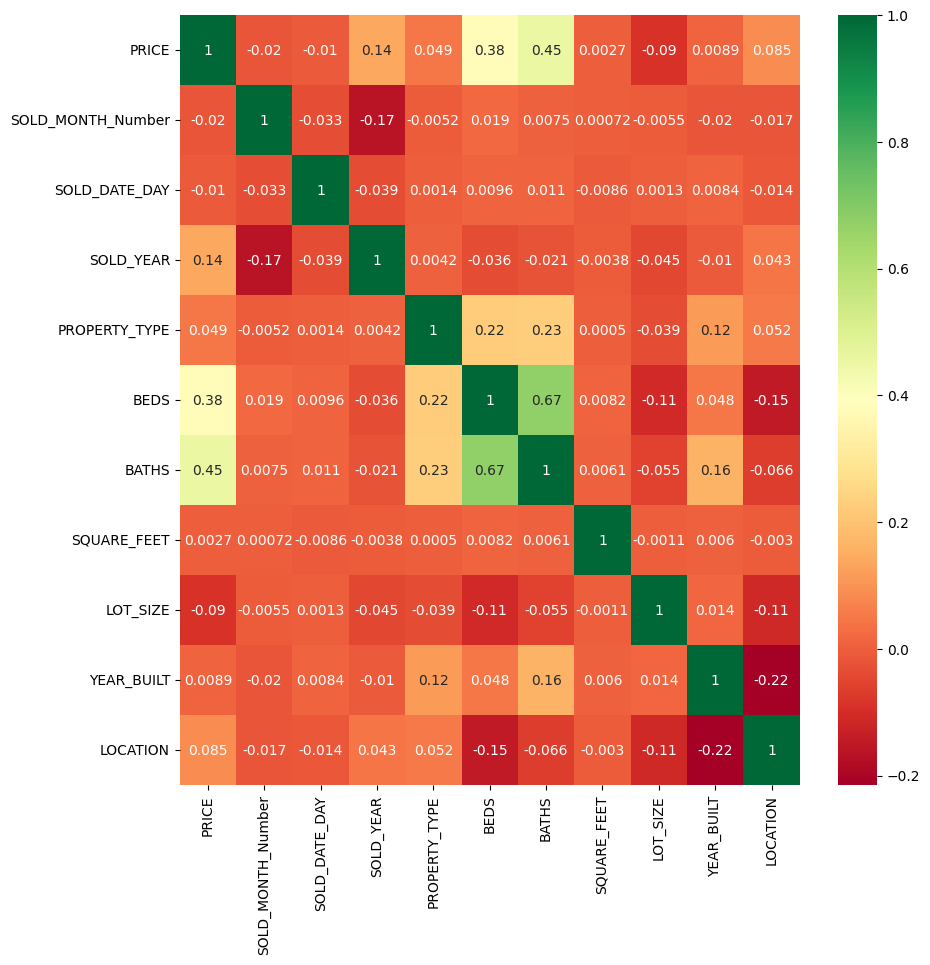

In [147]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")
plt.show()

In [148]:
df.to_csv('eda_data.csv')

In [151]:
data = pd.read_csv('apps/eda_data.csv', index_col=0)
data.head()

,PRICE,SOLD_MONTH_Number,SOLD_DATE_DAY,SOLD_YEAR,PROPERTY_TYPE,BEDS,BATHS,SQUARE_FEET,LOT_SIZE,YEAR_BUILT,LOCATION
18,332500,8,17,2021,0,1.0,1.0,703.0,27390.125019,1995.0,0
21,580000,3,28,2022,0,2.0,2.0,987.0,27390.125019,1995.0,0
62,770000,4,3,2020,1,5.0,2.5,2420.0,8613.000000,1996.0,0
71,750000,7,25,2019,1,5.0,2.5,2400.0,7270.000000,1996.0,0
89,1083000,1,24,2022,1,3.0,2.0,1540.0,11965.000000,1985.0,0


In [152]:
X = data.drop(['PRICE'], axis=1)
y = data['PRICE']

In [155]:
small_X,_,small_y,_ = train_test_split(X,y,test_size=0.7)
X_train,X_test,y_train,y_test=train_test_split(small_X,small_y,test_size=0.30)

In [129]:
# lg_model = LogisticRegression(max_iter=500)
# lg_model.fit(X_train, y_train)
# print("By using Logistic Regression we got:")
# print("Training data accuracy",lg_model.score(X_train, y_train))
# print("Testing data accuracy",lg_model.score(X_test, y_test))

In [130]:
# from sklearn.model_selection import RandomizedSearchCV
# rf_grid= {'n_estimators': np.arange(80,120,10),
#       'criterion':["mse", "mae"],
#       'max_features': ["auto", "sqrt", "log2"]
#   }
# print(rf_grid)

In [131]:
# rfm_randomcv=RandomizedSearchCV(estimator=rfm,param_distributions=rf_grid,cv=3,n_jobs=-1,
#                                random_state=20,verbose=1)
# rfm_randomcv.fit(X_train,y_train)

In [132]:
# rfm_randomcv.best_params_

In [163]:
rfm=RandomForestRegressor(n_estimators=90)
rfm.fit(X_train.values,y_train.values)
print(rfm.score(X_train.values,y_train.values))
print(rfm.score(X_test.values,y_test.values))

0.9602894502452296
0.7683775126785927


In [164]:

with open('Price_Model','wb') as f:
    pickle.dump(rfm,f)